# The Vigenère Cipher

The Vigenère cipher was invented by Giovan Battista Bellaso in 1553. Sometime later in history it was misattributed to a different person, Blaise de Vigenère, likely due to his improvement of the cipher he published in 1586 known as the Autokey variant. His name has stuck with the cipher ever since.

## Enciphering a Message
To encipher a message, first choose a word of phrase as the keyword for the message. For example, `UNICORN`. Repeatedly write this keyword over your plaintext message until your keystream is equal in length to your plaintext. We'll use a piece of a quote from Blaise de Vigenère himself:
> I saw Michelangelo at work. He had passed his sixtieth year and although he was not very strong, yet in a quarter of an hour he caused more splinters to fall from a very hard block of marble than three young masons in three or four times as long.

```
keystream: UNICORNUNICORNUNICORNU
plaintext: isawmichelangeloatwork
```

Then, proceed in a similar fashion as the Trithemius cipher, either using the tabula recta or mathematical approach with the Caesar cipher.

```
 keystream: UNICORNUNICORNUNICORNU
 plaintext: isawmichelangeloatwork
ciphertext: CFIYAZPBRTCBXRFBIVKFEE
```

## Deciphering a Message
Generate a keystream in the same way as when you're enciphering written over the ciphertext, and decipher in the same way as other tabula recta based ciphers. 

## Frequency Analysis
Looking at different length keys, see if you can spot a pattern in the resulting bar charts describing the ciphertext letter frequencies.

In [3]:
from seaborn import barplot

def vigenereEncipher(text, keyword):
    ciphertext = ''
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    text = textClean(text)
    keyword = textClean(keyword)

    for i in range(0, len(text)):
        plainnum = LETTERS.find( text[i] )
        keynum = LETTERS.find( keyword[i % len(keyword)] )
        ciphertext += LETTERS[ ( plainnum + keynum) % 26 ]

    return ciphertext

def textClean( text ):
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    text = text.upper()
    cleaned = ''
    for char in text:
        if char in LETTERS:
            cleaned += char
            
    return cleaned

def letterFrequency(text):
    text = textClean(text)
    frequencyList = []
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    
    for char in LETTERS:
        frequencyList.append( 100 * text.count(char) / len(text))
    
    return frequencyList

with open('pride-and-prejudice.txt', encoding="utf8") as f:
    text = textClean(f.read())

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

Using the text of Pride and Prejudice and a keyword of `UNI`.

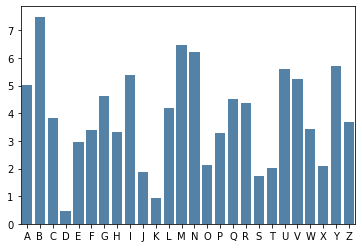

In [4]:
values = letterFrequency( vigenereEncipher( text, 'UNI') )
barplot(labels, values, color='steelblue');

Using the text of Pride and Prejudice and a keyword of `UNIS`.

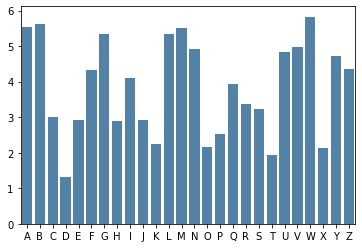

In [5]:
values = letterFrequency( vigenereEncipher( text, 'UNIS') )
barplot(labels, values, color='steelblue');

Using the text of Pride and Prejudice and a keyword of `UNICORNS`.

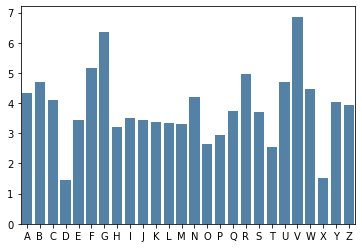

In [6]:
values = letterFrequency( vigenereEncipher( text, 'UNICORNS') )
barplot(labels, values, color='steelblue');

We can see that each time the keyword increases in length, the more uniform the frequency distribution becomes. That is, the more even the bars are to each other. While we will likely never obtain a perfectly uniform distribution where each bar has a height of $\frac{1}{26} \approx 0.03846$ or $3.846 \%$, it seems like the longer the keyword the closer we get to perfectly hiding the letter frequency. Unfortunately, remembering a really long keyword isn't the easiest thing to do. However,  Blaise de Vigenère's improvement to this cipher that generates a long keyword from a short one is the reason why people attribute this cipher to him, and it will be covered in the next section.

## Exercise for the Reader
Can you program a Vigenère encipher and decipher function? You can use the Trithemius cipher program as a starting point.